In [1]:
import math
def AMS(s, b):
    return math.sqrt(2*((s+b)*math.log(1+s/b)-s))

/afs/hep.wisc.edu/home/kaho/miniconda3/envs/coffeaenv_conda/lib/python3.9/site-packages/coffea/hist/plot.py:43: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  warnings.warn(


<AxesSubplot:xlabel='$m^{e\\mu}$ [GeV]', ylabel='Events'>

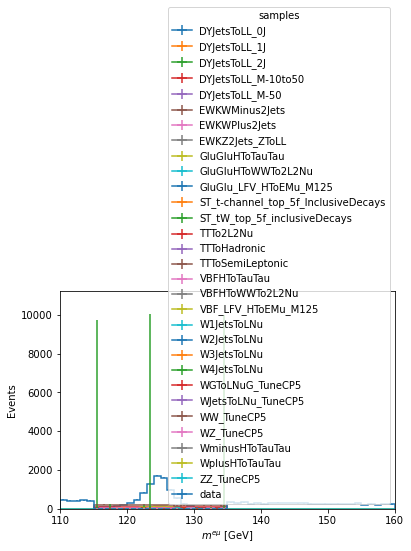

In [20]:
from coffea.util import save, load
from coffea import hist

histo = load("../results/2018/bTagWP/output_2016.coffea")
#hist.plot1d(histo[0]['emMass_deepjet_L'])

In [3]:
from coffea.util import save, load
from coffea import hist

list_of_t = ['TTTo2L2Nu', 'TTToSemiLeptonic', 'TTToHadronic', 
              'ST_tW_antitop_5f_inclusiveDecays', 'ST_tW_top_5f_inclusiveDecays', 
              'ST_t-channel_antitop_4f_InclusiveDecays', 'ST_t-channel_top_4f_InclusiveDecays']

list_of_SMH = ['GluGluHToTauTau', 'VBFHToTauTau', 
               'WminusHToTauTau', 'WplusHToTauTau', 
               'GluGluHToWWTo2L2Nu', 'VBFHToWWTo2L2Nu', 'ZHToTauTau']

list_of_diboson = ['ZZ_TuneCP5', 'WZ_TuneCP5', 'WW_TuneCP5']

list_of_DY = ['DYJetsToLL_M-50', 'DYJetsToLL_0J', 'DYJetsToLL_1J', 'DYJetsToLL_2J', 'DYJetsToLL_M-10to50']

list_of_WJ = ['WJetsToLNu_TuneCP5', 'W1JetsToLNu', 'W2JetsToLNu', 'W3JetsToLNu', 'W4JetsToLNu'] #WJetsToLNu_0J', 'WJetsToLNu_1J', 'WJetsToLNu_2J', 'WGToLNuG_TuneCP5']

list_of_EWK = ['EWKZ2Jets_ZToLL', 'EWKZ2Jets_ZToNuNu', 'EWKWMinus2Jets', 'EWKWPlus2Jets']

signals = ['GluGlu_LFV_HToEMu_M125', 'VBF_LFV_HToEMu_M125']

bkgs = list_of_t+list_of_SMH+list_of_diboson+list_of_DY+list_of_WJ+list_of_EWK

signal_None, signal_Jet_L, signal_Jet_M, signal_Jet_T, t_None, t_Jet_L, t_Jet_M, t_Jet_T, bkg_None, bkg_Jet_L, bkg_Jet_M, bkg_Jet_T = 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0  

years = ['2016preVFP','2016postVFP','2017','2018']
for year in years:
    histo = load(f"../results/{year}/bTagWP/output_reso2.coffea")
    print(histo)
    deepJet_None, deepJet_L, deepJet_M, deepJet_T = histo['emMass'], histo['emMass_deepjet_L'], histo['emMass_deepjet_M'], histo['emMass_deepjet_T']
    #deepcsv_L, deepcsv_M = histo[0]['emMass_deepcsv_L'].values(), histo[0]['emMass_deepcsv_M'].values()

    data_None, data_Jet_L, data_Jet_M, data_Jet_T = deepJet_None[('data',)].to_hist().sum().value, deepJet_L[('data',)].to_hist().sum().value, deepJet_M[['data'], :].to_hist().sum().value, deepJet_T[['data'], :].to_hist().sum().value   #[('data',)].sum(), deepJet_M[('data',)].sum()

    # # data_csv_L, data_csv_M = deepcsv_L[('data',)].sum(), deepcsv_M[('data',)].sum()

    signal_None += deepJet_None[(signals,)].to_hist().sum().value*5.9*10**-3
    signal_Jet_L += deepJet_L[(signals,)].to_hist().sum().value*5.9*10**-3
    signal_Jet_M += deepJet_M[(signals,)].to_hist().sum().value*5.9*10**-3
    signal_Jet_T += deepJet_T[(signals,)].to_hist().sum().value*5.9*10**-3

    t_None += deepJet_None[(list_of_t,)].to_hist().sum().value
    t_Jet_L += deepJet_L[(list_of_t,)].to_hist().sum().value
    t_Jet_M += deepJet_M[(list_of_t,)].to_hist().sum().value
    t_Jet_T += deepJet_T[(list_of_t,)].to_hist().sum().value

    bkg_None += deepJet_None[(bkgs,)].to_hist().sum().value
    bkg_Jet_L += deepJet_L[(bkgs,)].to_hist().sum().value
    bkg_Jet_M += deepJet_M[(bkgs,)].to_hist().sum().value
    bkg_Jet_T += deepJet_T[(bkgs,)].to_hist().sum().value
    
    # for i in signals:
    #     signal_Jet_L+= deepJet_L[(i,)].sum()
    #     signal_Jet_M+= deepJet_M[(i,)].sum()
    # #     signal_csv_L+= deepcsv_L[(i,)].sum()
    # #     signal_csv_M+= deepcsv_M[(i,)].sum()

    # for i in bkgs:
    #     bkg_Jet_L+= deepJet_L[(i,)].sum()
    #     bkg_Jet_M+= deepJet_M[(i,)].sum()
    # #     bkg_csv_L+= deepcsv_L[(i,)].sum()
    # #     bkg_csv_M+= deepcsv_M[(i,)].sum()

print('', 'Jet L', 'Jet M', 'Jet T', 'None')#, 'CSV L', 'CSV M' )
print('signal', signal_Jet_L, signal_Jet_M, signal_Jet_T, signal_None)#, signal_csv_L, signal_csv_M)
print('bkg', bkg_Jet_L, bkg_Jet_M, bkg_Jet_T, bkg_None)#, bkg_csv_L, bkg_csv_M)
print('top', t_Jet_L, t_Jet_M, t_Jet_T, t_None)#, bkg_csv_L, bkg_csv_M)
print('data', data_Jet_L, data_Jet_M, data_Jet_T, data_None)#, data_csv_L, data_csv_M)
AMS_L, AMS_M, AMS_T, AMS_None = AMS(signal_Jet_L, bkg_Jet_L), AMS(signal_Jet_M, bkg_Jet_M), AMS(signal_Jet_T, bkg_Jet_T), AMS(signal_None, bkg_None)
print('AMS', AMS_L, AMS_M, AMS_T, AMS_None)#, AMS(signal_csv_M, bkg_csv_M), AMS(signal_csv_M, bkg_csv_M))
print('% gain', 100*(AMS_L-AMS_M)/(AMS_L+AMS_M), 100*(AMS_M-AMS_T)/(AMS_M+AMS_T), 100*(AMS_T-AMS_None)/(AMS_T+AMS_None))

{'emMass': <Hist (dataset,emMass) instance at 0x7f63c06e4700>, 'emMass_deepjet_L': <Hist (dataset,emMass_deepjet_L) instance at 0x7f63c06d4310>, 'emMass_deepjet_M': <Hist (dataset,emMass_deepjet_M) instance at 0x7f63c069a610>, 'emMass_deepjet_T': <Hist (dataset,emMass_deepjet_T) instance at 0x7f63c069e550>}
{'emMass': <Hist (dataset,emMass) instance at 0x7f638dee9e80>, 'emMass_deepjet_L': <Hist (dataset,emMass_deepjet_L) instance at 0x7f638dee2790>, 'emMass_deepjet_M': <Hist (dataset,emMass_deepjet_M) instance at 0x7f638dee27f0>, 'emMass_deepjet_T': <Hist (dataset,emMass_deepjet_T) instance at 0x7f638dee2850>}
{'emMass': <Hist (dataset,emMass) instance at 0x7f638d7daac0>, 'emMass_deepjet_L': <Hist (dataset,emMass_deepjet_L) instance at 0x7f638d7d1610>, 'emMass_deepjet_M': <Hist (dataset,emMass_deepjet_M) instance at 0x7f638d7d1670>, 'emMass_deepjet_T': <Hist (dataset,emMass_deepjet_T) instance at 0x7f638d7d16d0>}
{'emMass': <Hist (dataset,emMass) instance at 0x7f638d7e7f10>, 'emMass_de

/afs/crc.nd.edu/user/k/kho2/miniconda3/envs/my-coffea-env/lib/python3.9/site-packages/coffea/hist/hist_tools.py:376: RuntimeWarning: Not all requested indices present in <Cat (name=dataset) instance at 0x7f63c06e4eb0>
  warnings.warn(
/afs/crc.nd.edu/user/k/kho2/miniconda3/envs/my-coffea-env/lib/python3.9/site-packages/coffea/hist/hist_tools.py:376: RuntimeWarning: Not all requested indices present in <Cat (name=dataset) instance at 0x7f638dee9670>
  warnings.warn(
/afs/crc.nd.edu/user/k/kho2/miniconda3/envs/my-coffea-env/lib/python3.9/site-packages/coffea/hist/hist_tools.py:376: RuntimeWarning: Not all requested indices present in <Cat (name=dataset) instance at 0x7f638d7da130>
  warnings.warn(
/afs/crc.nd.edu/user/k/kho2/miniconda3/envs/my-coffea-env/lib/python3.9/site-packages/coffea/hist/hist_tools.py:376: RuntimeWarning: Not all requested indices present in <Cat (name=dataset) instance at 0x7f638d7e7be0>
  warnings.warn(


 Jet L Jet M Jet T None
signal 136.48956240638302 145.31224212945415 146.89426353352084 147.97719658207762
bkg 20768.541619980213 28713.156844032586 40127.059473470625 101833.20563375883
top 10439.954887986703 17852.5599310577 29166.388003772903 90799.01425365753
data 11847.0 16031.0 22224.0 55110.0
AMS 0.9460667661822452 0.856832702855827 0.7328608445837591 0.4636016333463137
% gain 4.949475267970905 7.7984752766809144 22.50460973111956
